# Zadanie na 5

In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy import stats
import researchpy as rp
import matplotlib.pyplot as plt

#### Deklaracja funkcji Gaussa

In [2]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev) ** 2)


#### Wczytywanie danych

In [3]:
headings = ['index',
            'sex',
            'bodyweight',
            'heartweight']

data = pd.read_csv('../dane/cats.csv', names=headings, skiprows=1)
data = data[['sex', 'bodyweight', 'heartweight']]
data['bodyweight'] = data['bodyweight'].astype(float)
data['heartweight'] = data['heartweight'].astype(float)

#### Podział wczytanych danych na samce i samice

In [4]:
female = data[(data['sex'] == 'F')]
female.reset_index(inplace=True)
female

index sex  bodyweight  heartweight
0       0   F         2.0          7.0
1       1   F         2.0          7.4
2       2   F         2.0          9.5
3       3   F         2.1          7.2
4       4   F         2.1          7.3
5       5   F         2.1          7.6
6       6   F         2.1          8.1
7       7   F         2.1          8.2
8       8   F         2.1          8.3
9       9   F         2.1          8.5
10     10   F         2.1          8.7
11     11   F         2.1          9.8
12     12   F         2.2          7.1
13     13   F         2.2          8.7
14     14   F         2.2          9.1
15     15   F         2.2          9.7
16     16   F         2.2         10.9
17     17   F         2.2         11.0
18     18   F         2.3          7.3
19     19   F         2.3          7.9
20     20   F         2.3          8.4
21     21   F         2.3          9.0
22     22   F         2.3          9.0
23     23   F         2.3          9.5
24     24   F         2.3          9.6
25     25   F         2.3          9.7
26     26   F         2.3         10.1
27     27   F         2.3         10.1
28     28   F         2.3         10.6
29     29   F         2.3         11.2
30     30   F         2.4          6.3
31     31   F         2.4          8.7
32     32   F         2.4          8.8
33     33   F         2.4         10.2
34     34   F         2.5          9.0
35     35   F         2.5         10.9
36     36   F         2.6          8.7
37     37   F         2.6         10.1
38     38   F         2.6         10.1
39     39   F         2.7          8.5
40     40   F         2.7         10.2
41     41   F         2.7         10.8
42     42   F         2.9          9.9
43     43   F         2.9         10.1
44     44   F         2.9         10.1
45     45   F         3.0         10.6
46     46   F         3.0         13.0

In [5]:
male = data[(data['sex'] == 'M')]
male.reset_index(inplace=True)
male

index sex  bodyweight  heartweight
0      47   M         2.0          6.5
1      48   M         2.0          6.5
2      49   M         2.1         10.1
3      50   M         2.2          7.2
4      51   M         2.2          7.6
..    ...  ..         ...          ...
92    139   M         3.7         11.0
93    140   M         3.8         14.8
94    141   M         3.8         16.8
95    142   M         3.9         14.4
96    143   M         3.9         20.5

[97 rows x 4 columns]

#### Sprawdzenie normalności rozkładów oraz wariancji danych (waga serca) dla obu płci

In [27]:
pValueTest = 0.05 ## 5% poziom istotności statystycznej
_, pValueMale = stats.shapiro(male['heartweight'])
_, pValueFemale = stats.shapiro(female['heartweight'])
print("P-wartość samce:", pValueMale)
print("P-wartość samice:", pValueFemale)

if (pValueMale > pValueTest):
    print("Cecha \"waga ciała\" dla samców ma zbliżony rozkład do rozkładu normalnego")
else:
    print("Cecha \"waga ciała\" dla samców nie ma zbliżonego rozkładu do rozkładu normalnego")
if (pValueFemale > pValueTest):
    print("Cecha \"waga ciała\" dla samic ma zbliżony rozkład do rozkładu normalnego")
else:
    print("Cecha \"waga ciała\" dla samic nie ma zbliżonego rozkładu do rozkładu normalnego")

print("Levene: ", stats.levene(male['heartweight'], female['heartweight']))

varianceMale = np.var(male['heartweight'])
varianceFemale = np.var(female['heartweight'])
print("Wariancja danych dla samców: {}".format(round(varianceMale,5)))
print("Wariancja danych dla samic: {}".format(round(varianceFemale,5)))

P-wartość samce: 0.09039346873760223
P-wartość samice: 0.5434856414794922
Cecha "waga ciała" dla samców ma zbliżony rozkład do rozkładu normalnego
Cecha "waga ciała" dla samic ma zbliżony rozkład do rozkładu normalnego
Levene:  LeveneResult(statistic=14.923914891154576, pvalue=0.0001695914950658728)
Wariancja danych dla samców: 6.3966
Wariancja danych dla samic: 1.80404


#### Przeprowadzenie testu t Welcha na danych

In [7]:
statisticValue, pValue = stats.ttest_ind(female['heartweight'], male['heartweight'], equal_var = False)
print("Badanie cechy \"waga ciała\" dla kotów płci żeńskiej i męskiej:\n")
print("Wartość testu t Welcha: {}".format(statisticValue, 7))
print("Wartość pValue: {}".format(pValue))
if (pValue > pValueTest):
    print("Przy pomocy badanej cechy \"waga ciała\" można rozróżnić płeć kotów")
else:
    print("Przy pomocy badanej cechy \"waga ciała\" nie można rozróżnić płci kotów")

Badanie cechy "waga ciała" dla kotów płci żeńskiej i męskiej:

Wartość testu t Welcha: -6.5178560174655376
Wartość pValue: 1.1859905829476679e-09
Przy pomocy badanej cechy "waga ciała" nie można rozróżnić płci kotów


In [8]:
#### Obliczenie liczby przedziałów dla wagi ciała

In [9]:
bodybins = int((data['bodyweight'].max() - data['bodyweight'].min()) * 10.0)

In [10]:
#### Rysowanie histogramu wagi ciała kotów

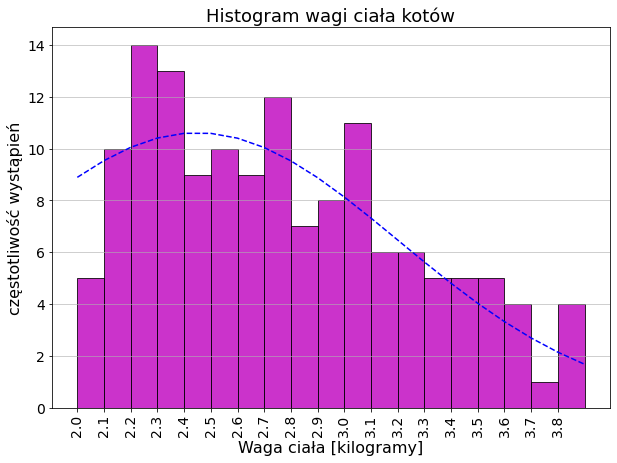

In [11]:
plt.figure(figsize=(10, 7))
plt.xticks(np.arange(data['bodyweight'].min(), data['bodyweight'].max(), 0.1))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga ciała [kilogramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, _ = plt.hist(data['bodyweight'].values, bins=bodybins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins) - 1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi ciała kotów", FontSize='18')
plt.show()

In [12]:
#### Obliczenie liczby przedziałów dla wagi serca

In [13]:
heartbins = int((data['heartweight'].max() - data['heartweight'].min()) * 2.0)

In [14]:
#### Rysowanie histogramu wagi serca kotów

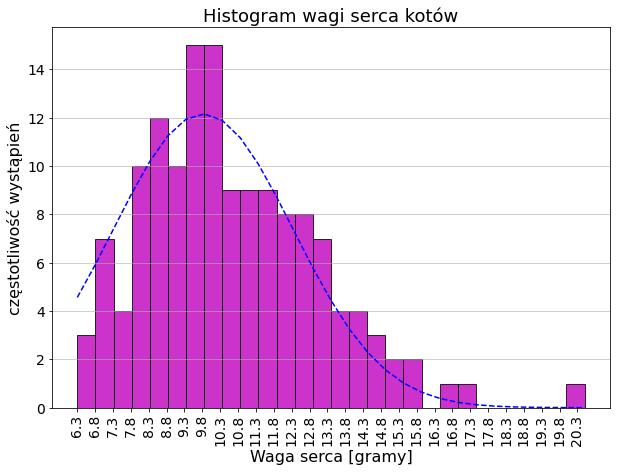

In [15]:
plt.figure(figsize=(10, 7))
plt.xticks(np.arange(data['heartweight'].min(), data['heartweight'].max(), 0.5))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, _ = plt.hist(data['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins) - 1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów", FontSize='18')
plt.show()

#### Rysowanie histogramu wagi serca kotów (dziewczynki)

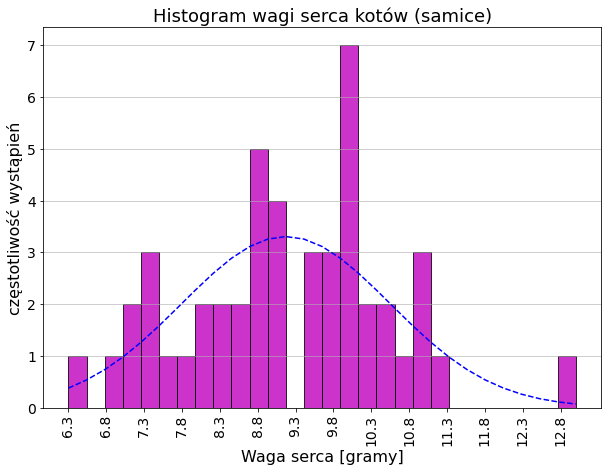

In [16]:
plt.figure(figsize=(10, 7))
plt.xticks(np.arange(female['heartweight'].min(), female['heartweight'].max(), 0.5))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, _ = plt.hist(female['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins) - 1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów (samice)", FontSize='18')
plt.show()

#### Rysowanie histogramu wagi serca kotów (chłopcy)

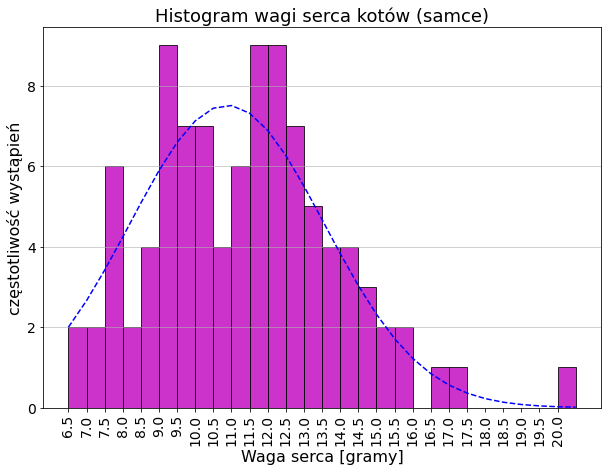

In [32]:
plt.figure(figsize=(10, 7))
plt.xticks(np.arange(male['heartweight'].min(), male['heartweight'].max(), 0.5))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(male['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins) - 1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów (samce)", FontSize='18')
plt.show()
